In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Data loading

In [3]:
transform = transforms.ToTensor()

In [4]:
train_dataset = datasets.CIFAR10(root='./db/c10', train = True, download = True, transform = transform)

Files already downloaded and verified


In [5]:
test_dataset = datasets.CIFAR10(root = './db/c10', train = False, download = True, transform = transform)

Files already downloaded and verified


In [6]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./db/c10
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
train_dataset[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [8]:
img1, label1 = train_dataset[0]

In [9]:
torch.manual_seed(101)
train_loader = DataLoader(train_dataset, batch_size = 4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 4, shuffle = False)

In [12]:
for images, labels in train_loader:
    break

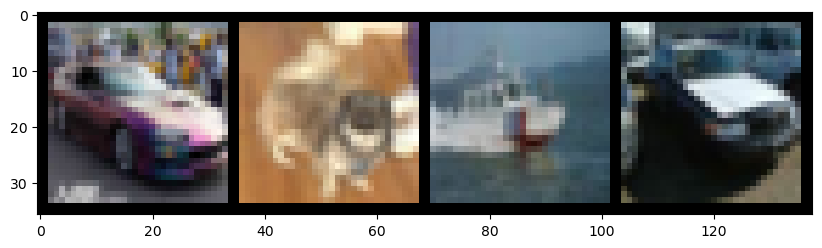

In [14]:
im = make_grid(images, nrow = 5)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

# Model Architecture

In [43]:
class CN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(6*6*6*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1, 6*6*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim = 1)
        
        
        

In [45]:
(((32-2)/2)-2)/2

6.5

In [47]:
torch.manual_seed(101)
model = CN()
model

CN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=3456, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [49]:
for prm in model.parameters():
    print(prm.numel())

450
6
864
16
414720
120
10080
84
840
10


In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        predictect = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_losses.append(loss)
    train_correct.append(trn_corr)

    model.eval()
    
    with torch.no_grad():
        for b, (X_train, y_train) in enumerate(test_loader):
            y_pred = model(X_train)
            loss = criterion(y_pred, y_train)
            predicted = torch.max(y_pred.data, 1)[1]
            batch_corr = (predicted == y_train).sum()
            tst_corr += batch_corr
        train_losses.append(losss)
        test_correct.append(tst_corr)